In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
# 加载数据集
data = pd.read_csv('cleaned_data.csv')

print('数据基本信息：')
data.info()

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fe               187 non-null    float64
 1   Co               187 non-null    float64
 2   Mn               187 non-null    float64
 3   Al               187 non-null    float64
 4   Ni               187 non-null    float64
 5   B                187 non-null    float64
 6   Hf               187 non-null    float64
 7   Si               187 non-null    float64
 8   Cu               187 non-null    float64
 9   P                187 non-null    float64
 10  Mo               187 non-null    float64
 11  Cr               187 non-null    float64
 12  La               187 non-null    float64
 13  Ti               187 non-null    float64
 14  Sn               187 non-null    float64
 15  V                187 non-null    float64
 16  Ga               187 non-null    float64
 17  Nb      

In [14]:
# 查看列名
column_names = data.columns
print(column_names)

Index(['Fe', 'Co', 'Mn', 'Al', 'Ni', 'B', 'Hf', 'Si', 'Cu', 'P', 'Mo', 'Cr',
       'La', 'Ti', 'Sn', 'V', 'Ga', 'Nb', 'Zr', 'C', 'Gd', 'Y', 'Ta', 'DO3',
       'BCC', 'FCC', 'HCP', 'Orthorhombic', 'hexagonal', 'Tetragonal',
       'Primitive Cubic', 'Ms', 'Hc', 'Hc_log'],
      dtype='object')


In [15]:
# 假设 data 是已经定义好的 DataFrame
# 提取特征变量 x 和目标变量 y（多目标）
x = data.drop(columns=['Ms', 'Hc', 'Hc_log'])
y = data[['Ms', 'Hc_log']]  # 变成包含两个目标变量的 DataFrame

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 创建线性回归模型并拟合数据
model = LinearRegression()
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)

In [16]:
# 设置图表参数
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False

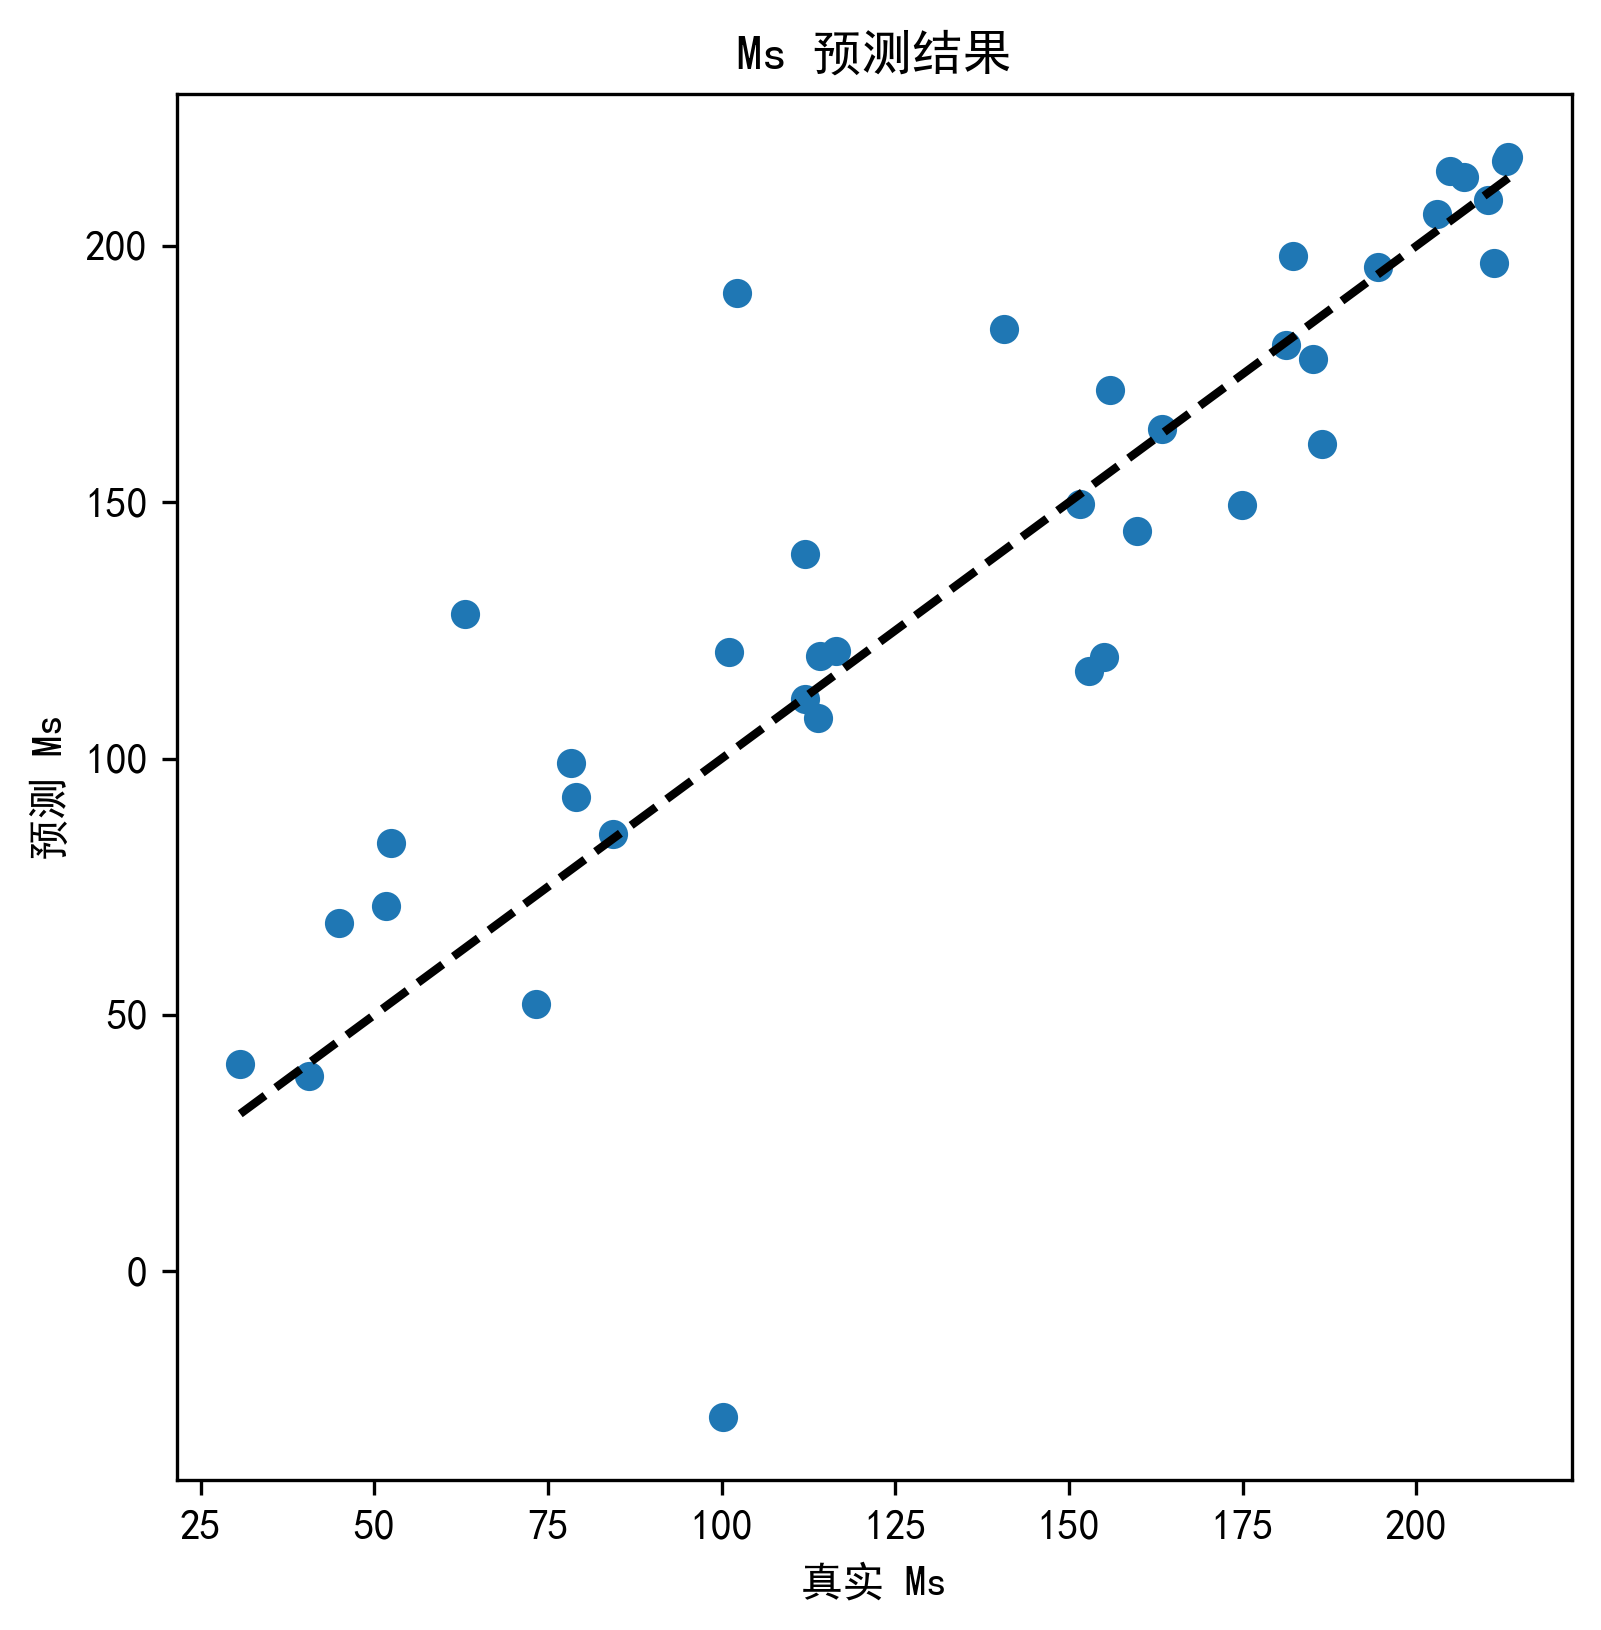

In [17]:
# 绘制 Ms 的预测结果
plt.figure(figsize=(6, 6))
plt.scatter(y_test['Ms'], y_pred[:, 0])
plt.xlabel('真实 Ms')
plt.ylabel('预测 Ms')
plt.title('Ms 预测结果')
plt.plot([y_test['Ms'].min(), y_test['Ms'].max()], [y_test['Ms'].min(), y_test['Ms'].max()], 'k--', lw=2)
plt.savefig('Ms_预测结果.png')
plt.show()

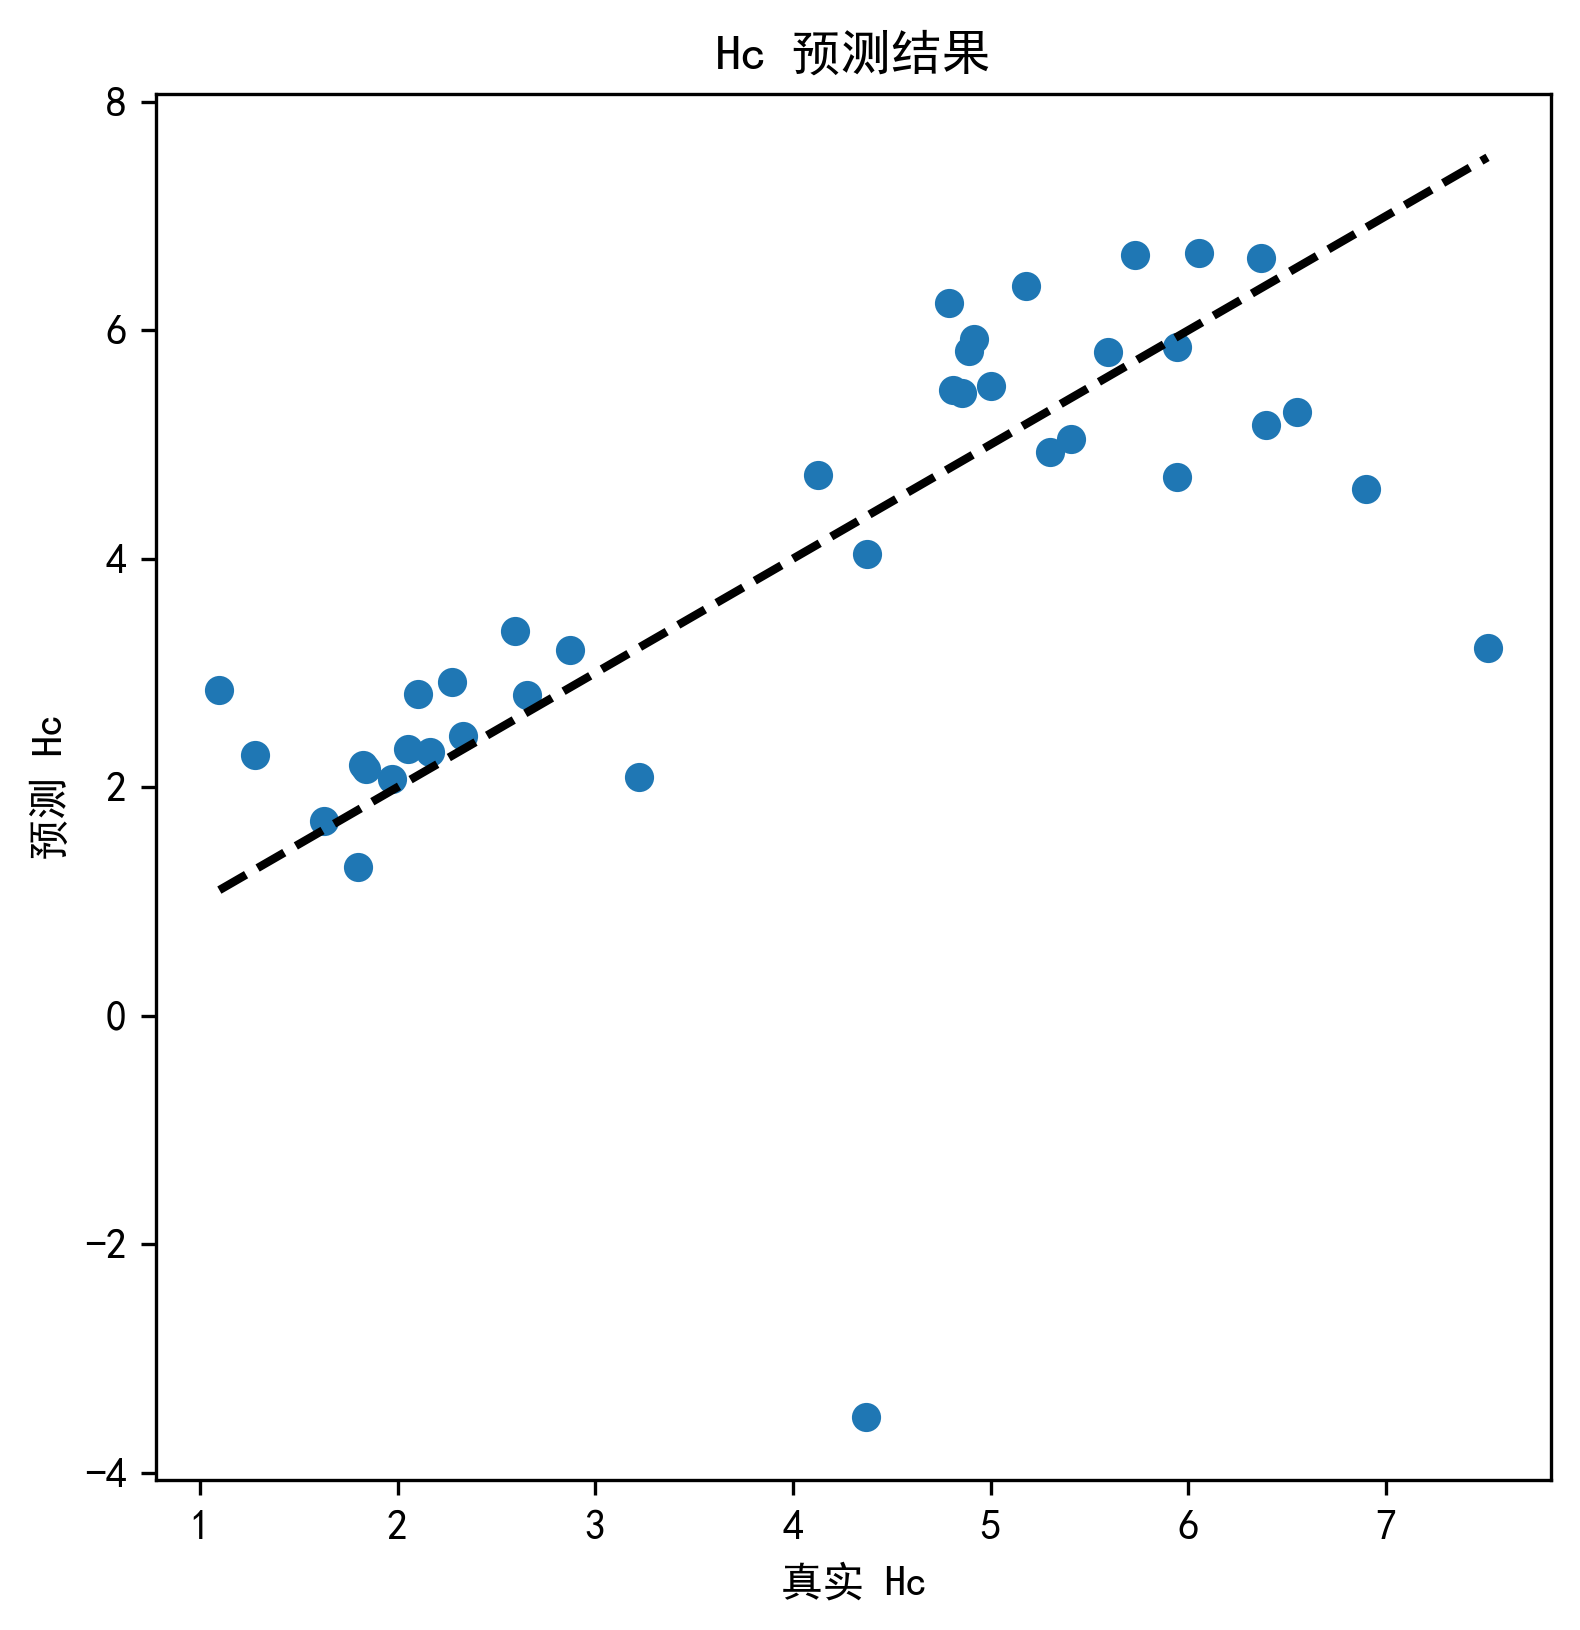

In [18]:
# 绘制 Hc 的预测结果
plt.figure(figsize=(6, 6))
plt.scatter(y_test['Hc_log'], y_pred[:, 1])
plt.xlabel('真实 Hc')
plt.ylabel('预测 Hc')
plt.title('Hc 预测结果')
plt.plot([y_test['Hc_log'].min(), y_test['Hc_log'].max()], [y_test['Hc_log'].min(), y_test['Hc_log'].max()], 'k--', lw=2)
plt.savefig('Hc_预测结果.png')
plt.show()

In [19]:
# 计算均方误差（MSE）
mse_ms = mean_squared_error(y_test['Ms'], y_pred[:, 0])
mse_hc = mean_squared_error(y_test['Hc_log'], y_pred[:, 1])

# 计算决定系数（R²）
r2_ms = r2_score(y_test['Ms'], y_pred[:, 0])
r2_hc = r2_score(y_test['Hc_log'], y_pred[:, 1])

print(f"Ms 均方误差 (MSE): {mse_ms}")
print(f"Ms 决定系数 (R²): {r2_ms}")
print(f"Hc 均方误差 (MSE): {mse_hc}")
print(f"Hc 决定系数 (R²): {r2_hc}")

Ms 均方误差 (MSE): 1047.2886656027624
Ms 决定系数 (R²): 0.6715211283718859
Hc 均方误差 (MSE): 2.806961559883055
Hc 决定系数 (R²): 0.16398024687921386


In [20]:
# 特征集列名
feature_columns = ['Fe', 'Co', 'Mn', 'Al', 'Ni', 'B', 'Hf', 'Si', 'Cu', 'P', 'Mo', 'Cr',
       'La', 'Ti', 'Sn', 'V', 'Ga', 'Nb', 'Zr', 'C', 'Gd', 'Y', 'Ta', 'DO3',
       'BCC', 'FCC', 'HCP', 'Orthorhombic', 'hexagonal', 'Tetragonal',
       'Primitive Cubic']

In [21]:
# 准备输入数据
TEST_data = {
    'Fe': [74.00],
    'Co': [0],
    'Mn': [0],
    'Al': [9.73],
    'Ni': [0],
    'B': [0],
    'Hf': [0],
    'Si': [16.27],
    'Cu': [0],
    'P': [0],
    'Mo': [0],
    'Cr': [0],
    'La': [0],
    'Ti': [0],
    'Sn': [0],
    'V': [0],
    'Ga': [0],
    'Nb': [0],
    'Zr': [0],
    'C': [0],
    'Gd': [0],
    'Y': [0],
    'Ta': [0],
    'DO3': [1],
    'BCC': [1],
    'FCC': [0],
    'HCP': [0],
    'Orthorhombic': [0],
    'hexagonal': [0],
    'Tetragonal': [0],
    'Primitive Cubic': [0],
}

# 将数据字典转换为 DataFrame
input_df = pd.DataFrame(TEST_data)
input_df = input_df[feature_columns]  # 确保列顺序一致

# 使用模型进行预测
predicted_values = model.predict(input_df)

# 输出预测结果
print(f"Predicted Ms: {predicted_values[0][0]}")
print(f"Predicted log(Hc+1): {predicted_values[0][1]}") 

Predicted Ms: 156.49693672558124
Predicted log(Hc+1): 4.469795271172757
